In [2]:
import random
import pickle
import glob

import random
import ast
import pathlib

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms



from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





## Classes & Functions for Different MMs

In [3]:
### Perfect or Near Perfect MM

class PerfectMM:
    def __init__(self, n_players, wr=0.5, req_net_games = 40):
        ### win rate that the algorithm aims for
        self.wr = wr
        ### lose rate (?)
        self.lr = 1 - self.wr
        ### number of players involved
        self.n_players = n_players
        ### required number of net games won
        self.req_net_games = req_net_games
        
    def compute(self, save=False):
        ### compute start time
        self.start = time()
        ### number of games per player
        self.start = time()
        self.n_games_list = []
        ### win rates of all players
        self.player_wr_list = []
        
        ### record of all games by the population (eg. 1000 players)
        self.record_all = []
        
        ### save or not save the record of games
        self.save = save
        
        ### win or lose ?
        outcome_list = [1, 0]   ### 1 for WIN, 0 for DEFEAT
        
        for _ in tqdm(range(self.n_players)):
            # all games for ONE player
            all_games = []
            ### number of games played so far for each player
            n_games = 0
            ### number of net games won
            n_wins = 0
            
            while n_wins < self.req_net_games:
                ### play one game & add to n_games
                n_games += 1
                ### result of played game
                one_game = random.choices(outcome_list, weights=(self.wr, self.lr))[0]
                all_games.append(one_game)
                
                if one_game == 1:
                    n_wins += 1
                else:
                    n_wins -= 1
                    

            player_wr = sum(all_games)/len(all_games)
            self.player_wr_list.append(player_wr)
            self.n_games_list.append(n_games)
            
            ### append all games played by one player to record of all games played by population in question
            self.record_all.append(all_games)
            
           
        ### number of average games played per player
        self.n_avg_games = sum(self.n_games_list) / self.n_players
        ### average win rate
        self.avg_wr = sum(self.player_wr_list) / self.n_players
        ### compute end time
        self.end = time()
        ### compute duration
        self.compute_time = self.end - self.start
        
        
        ### save or not save record of all games by all players 
        if self.save is False:
            self.filename = f'No saved files created'
            pass
        else:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            self.filename = f'saved_lists/perfectmm_{timestamp}.txt'
            with open(self.filename, 'wb') as file:
                pickle.dump(self.record_all, file)
                
                
            
        
    def report(self):
        print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
        print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
        print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
        print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
        print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
        print(f'Saved Result(filename): {self.filename} \n')

In [4]:
### Streak MM

class StreakMM:
    def __init__(self, n_players, req_net_games = 40):
        ### number of players involved
        self.n_players = n_players
        ### required number of net games won
        self.req_net_games = req_net_games
        
        
        
        
    def compute(self, wsr=0.5, wlr=0.85, n_streak=6, bottom=True, n_bottom=0, save=False):
        ### compute start time
        self.start = time()
        
        ### number of games per player
        self.n_games_list = []
        
        ### win rates of all players
        self.player_wr_list = []
        
        ### record of all games by the population (eg. 1000 players)
        self.record_all = []
        
        ### save or not save the record of games
        self.save = save
        
        ### streak probabilities
        self.wsr = wsr
        self.lsr = 1 - self.wsr
        
        ### number of games per streak
        self.n_streak = n_streak
        
        ### win or lose rate per streak
        self.wlr = wlr
        
        ### bottom net games won
        self.bottom = bottom
        
        ### threshold for bottom net games won
        self.n_bottom = n_bottom
        
        ### Two types of streaks
        streak_list = ['WS', 'LS']
        ### win or lose ?
        outcome_list = [1, 0]
        
        for _ in tqdm(range(self.n_players)):
            # all games for ONE player
            all_games = []
            ### number of games played so far for each player
            n_games = 0
            ### number of net games won
            n_wins = 0
                    
            while n_wins < self.req_net_games:
                ### random select one streak
                one_streak = random.choices(streak_list, weights=(self.wsr, self.lsr))[0]
                ### add number of games of streak to number of games played
                n_games += self.n_streak
                
                ### if WS (win streak)
                if one_streak == "WS":
                    wr = self.wlr
                    lr = 1-self.wlr
                
                    ### randomly pick streak results given which streak
                    streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
                    all_games.extend(streak_result)
                    
                    for wl in streak_result:
                        if wl == 1:
                            n_wins += 1
                        else:
                            n_wins -= 1
                
                ### if LS (Losing Streak)
                else:
                    wr = 1-self.wlr
                    lr = self.wlr
                    
                    ### randomly pick streak results given which streak
                    streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
                    all_games.extend(streak_result)
                    
                    for wl in streak_result:
                        if wl == 1:
                            n_wins += 1
                        else:
                            n_wins -= 1
                            if self.bottom == True:
                                if n_wins < abs(self.n_bottom) * (-1):
                                    n_wins = abs(self.n_bottom) * (-1)
                                else:
                                    pass
                            else:
                                pass
                            
                            
#                             if self.bottom == False:
#                                 n_wins -= 1
#                             else:
#                                 n_wins
#                                 if n_wins < 0:
#                                     n_wins = abs(self.n_bottom) * (-1)
            
            ### calculate and organize result
            # victory = 0
            # defeat = 0
            
            # for game in all_games:
            #     if game == "W":
            #         victory += 1
            #     else:
            #         defeat += 1
                
            self.n_games_list.append(n_games)
            player_wr = sum(all_games)/len(all_games)
            self.player_wr_list.append(player_wr)
            
            ### append all games played by one player to record of all games played by population in question
            self.record_all.append(all_games)
                
                
        ### number of average games played per player
        self.n_avg_games = sum(self.n_games_list) / self.n_players
        ### average win rate
        self.avg_wr = sum(self.player_wr_list) / self.n_players
        
        ### compute end time
        self.end = time()
        ### compute duration
        self.compute_time = self.end - self.start
        
        ### save or not save record of all games by all players 
        if self.save is False:
            self.filename = f'No saved files created'
            pass
        else:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            self.filename = f'saved_lists/streakmm_{timestamp}.txt'
            with open(self.filename, 'wb') as file:
                pickle.dump(self.record_all, file)
            
        
    def report(self):
        print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
        print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
        print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
        print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
        print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
        print(f'Saved Result(filename): {self.filename} \n')
        
        
    
        
        

In [5]:
### streak generator
#### using list.extend

def streak_gen(streak_size, result_size):    ### number of games
  result_streak = []

  n_games = result_size

  n_games_played = 0

  while n_games_played <= n_games:

    streak_size = streak_size
    streak = random.choices(['WS','LS'], weights=(0.5,0.5))[0]

    if streak == 'WS':
      wr = 0.85
      lr = 0.15
      # print(lr,wr)
      
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    else:
      wr = 0.15
      lr = 0.85
      # print(lr,wr)
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    n_games_played += streak_size


  return result_streak[:result_size]

In [6]:
def streak_counter(llist):
  result_dict = {
    ### 0 for Loss
    0: [],
    ### 1 for Win 
    1: []    
  }

  streak_size = 1

  for i in range(len(llist)):
    if i != len(llist)-1:
      if llist[i] != llist[i+1]:
        result_dict[llist[i]].append(streak_size)
        streak_size = 1

      elif llist[i] == llist[i+1]:
        streak_size += 1
    else:
      result_dict[llist[i]].append(streak_size)

  return result_dict


In [7]:
### function for calulating the average of number of consecutive results
def avg_cal(ddict):
  return np.mean(ddict[0]), np.mean(ddict[1])



## Configuration

In [8]:
### number of net games required
net_games_required = 40

## Generate Histories

### PerfectMM - 1000 players // 1000 games each

In [9]:
seeds = [222, 713, 944, 4, 12]

In [10]:
### IF STREAKS DON'T EXIST
### Perfect (wr 0.5)

start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### 1000 players SIM 1 ~ 5
### set random seed
for seed in seeds:

    random.seed(seed)

    ### perfect MM algorithm
    # for multiple players...

    # win rate
    wr = 0.50

    # lose rate
    lr = 1 - wr

    outcome_list = [1, 0]

    n_players = 1000    ### including Paul
    n_games = 1000

    histories = []

    ### open file
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'saved_lists/perfectmm/perfectmm_{seed}.txt'
    # filename = 'saved_lists/perfectmm/example.txt'

    history_file = open(filename, 'w')



    for _ in range(n_players):
        games_list = []

        while len(games_list) < n_games:
            one_game = random.choices(outcome_list, weights=(wr, lr))[0]
            games_list.append(one_game)

        history_file.write(f'{games_list}, ')
    
    

    history_file.close()
        

##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2023-10-17 20:34:47



----------------------------------------------------
done in 6.141s.
2023-10-17 20:34:53


In [11]:
history_list = []
# with open('saved_lists/perfectmm/example.txt', 'r') as history_file:
with open('saved_lists/perfectmm/perfectmm_4.txt', 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    


In [12]:
len(history_list)

1000

In [13]:
len(history_list[0])

1000

### NearPerfectMM - 1000 players // 1000 games each

In [14]:
seeds = [6, 423, 157, 174, 933]

In [15]:
### IF STREAKS DON'T EXIST
### Almost Perfect (wr 0.501) 

start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### 1000 players SIM 1 ~ 5
### set random seed
for seed in seeds:

    random.seed(seed)

    ### perfect MM algorithm
    # for multiple players...

    # win rate
    wr = 0.501

    # lose rate
    lr = 1 - wr

    outcome_list = [1, 0]

    n_players = 1000    ### including Paul
    n_games = 1000

    # histories = []

    ### open file
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'saved_lists/nearperfectmm/nearperfectmm_{seed}.txt'
    # filename = 'saved_lists/nearperfectmm/example.txt'

    history_file = open(filename, 'w')



    for _ in range(n_players):
        games_list = []

        while len(games_list) < n_games:
            one_game = random.choices(outcome_list, weights=(wr, lr))[0]
            games_list.append(one_game)

        history_file.write(f'{games_list}, ')
    
    

    history_file.close()
        

##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2023-10-17 20:35:26



----------------------------------------------------
done in 6.137s.
2023-10-17 20:35:32


### StreakMM - 1000 players // 1000 games each

In [ ]:
seeds = [4, 34, 11, 68, 89]

In [16]:
### when streaks exist
### ws:ls = 50:50
### 85% of win/loss depending on the streak
### streak duration = 6 games



start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### 1000 players SIM 1 ~ 5


# histories = []

### open file
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

n_players = 1000    ### including Paul
n_games = 1000
streak_dur = 6

for seed in seeds:
    
    filename = f'saved_lists/streakmm/streakmm_{seed}.txt'
    # filename = 'saved_lists/streakmm/example.txt'

    history_file = open(filename, 'w')

    for _ in range(n_players):
        result_n = streak_gen(6, n_games)     # 3000 games played per player
        history_file.write(f'{result_n}, ')

    history_file.close()
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2023-10-17 20:36:11



----------------------------------------------------
done in 2.539s.
2023-10-17 20:36:14


## Visualize

In [18]:
history_list = []
# with open('saved_lists/streakmm/example.txt', 'r') as history_file:
# with open('saved_lists/perfectmm/perfectmm_4.txt', 'r') as history_file:
with open('saved_lists/streakmm/streakmm_157.txt', 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    


In [32]:
print(len(history_list))
print(type(history_list))

1000
<class 'list'>


In [33]:
# data = np.array()
# data = np.array(history_list[1][:300]).reshape(15,20)
data = np.array(history_list[3]).reshape(25,40)


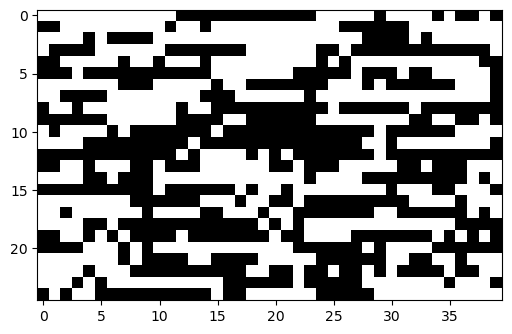

In [34]:
plt.figure(figsize=(6,6))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()

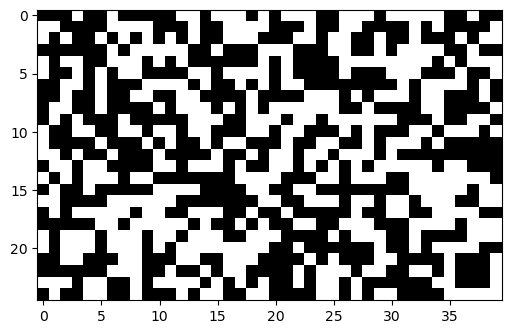

In [30]:
plt.figure(figsize=(6,6))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()

In [20]:
# plt.figure(figsize=(6,6))
# plt.axis('off')
# # plt.figure(figsize=(6,6), frameon=False)
# # plt.imshow(data, cmap='viridis')
# # plt.imshow(data)
# plt.imshow(data, cmap='binary')
# # plt.savefig('foo.png')
# plt.savefig('foo.png', bbox_inches='tight', pad_inches=0)

In [ ]:
# history_list = []
# with open('saved_lists/nearperfectmm/nearperfectmm_6.txt', 'r') as history_file:
#     history_list.extend(ast.literal_eval(history_file.read()))
    


In [ ]:
# print(len(history_list))
# print(type(history_list))

In [ ]:
# # data = np.array()
# data = np.array(history_list[0]).reshape(15,20)


In [ ]:
# plt.figure(figsize=(6,6))
# # plt.imshow(data, cmap='viridis')
# # plt.imshow(data)
# plt.imshow(data, cmap='binary')
# plt.show()

In [ ]:
# history_list = []
# with open('saved_lists/nearperfectmm_20231015_235059.txt', 'r') as history_file:
#     history_list.extend(ast.literal_eval(history_file.read()))
    


In [ ]:
# len_list = []
# for item in history_list:
#     len_list.append(len(item))

In [ ]:
# # max(len_list)
# min(len_list)

In [ ]:
# n_history_list = []
# for item in history_list:
#     n_history_list.append(item[:min(len_list)])

In [ ]:
# # data = np.array()
# data = np.array(n_history_list[:100])


In [ ]:
# plt.figure(figsize=(7,7))
# # plt.imshow(data, cmap='viridis')
# # plt.imshow(data)
# plt.imshow(data, cmap='binary')
# plt.show()

## Save Images

In [168]:
# parent_folders = ["saved_lists/perfectmm/"]
parent_folders = ["saved_lists/perfectmm/", 'saved_lists/nearperfectmm/', 'saved_lists/streakmm/']

In [169]:
for item in parent_folders:
    print(pathlib.Path(item))

saved_lists\perfectmm


In [170]:
paths = []
for item in parent_folders:
    item = pathlib.Path(item)
    paths.extend(glob.glob(f'{item}\\*.txt'))
    
print(paths)

['saved_lists\\perfectmm\\perfectmm_4.txt']


In [171]:
print(len(paths))

1


In [172]:
ppath = paths[0]
ppath
# ppath.split('\\')[-1][:-4] + '_image_1.png'

'saved_lists\\perfectmm\\perfectmm_4.txt'

In [173]:
ppath = paths[0]

print(ppath.split('\\')[0])
print(ppath.split('\\')[1])

saved_lists
perfectmm


In [175]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


for txtfile in paths:
    history_list = []
    with open(txtfile, 'r') as history_file:
        history_list.extend(ast.literal_eval(history_file.read()))
        
    ### len(record) = 300 // 15 rows, 20 columns
    for i in range(len(history_list)):
        ssplit = txtfile.split('\\')
        filename = f'{ssplit[0]}\\{ssplit[1]}\\images\\{ssplit[-1][:-4]}_image_{i+1}.png'
        # filename = txtfile.split('\\')[-1][:-4] + f'_image_{i+1}.png'
        
        # data = np.array(history_list[i]).reshape(15,20)
        data = np.array(history_list[i][:300]).reshape(15,20)
        
        plt.figure(figsize=(6,6))
        plt.axis('off')
        plt.imshow(data, cmap='binary')
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
        plt.close()
        
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

# MISC 

In [ ]:
# 'saved_lists/perfectmm\\perfectmm_12.txt'.split('/')

In [ ]:
history_list = []
# with open('saved_lists/streakmm/example.txt', 'r') as history_file:
with open(paths[-1], 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    


In [ ]:
# data = np.array()
data = np.array(history_list[1]).reshape(15,20)


In [ ]:
plt.figure(figsize=(6,6))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()

In [ ]:
history_list = []
# with open('saved_lists/streakmm/example.txt', 'r') as history_file:
with open(paths[0], 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    
# data = np.array()
data = np.array(history_list[1]).reshape(15,20)

plt.figure(figsize=(6,6))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()

## Clear Variables

In [176]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [177]:
data

NameError: name 'data' is not defined

In [4]:
ddata = np.array([0,1]*50).reshape(10,10)

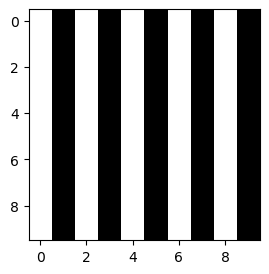

In [13]:

plt.figure(figsize=(3,3))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(ddata, cmap='binary')
plt.show()

In [16]:
ddata = np.array([0,1,0,1,0,1,0,1,0,1,
                  1,0,1,0,1,0,1,0,1,0,
                  0,1,0,1,0,1,0,1,0,1,
                  1,0,1,0,1,0,1,0,1,0,
                  0,1,0,1,0,1,0,1,0,1,
                  1,0,1,0,1,0,1,0,1,0,
                  0,1,0,1,0,1,0,1,0,1,
                  1,0,1,0,1,0,1,0,1,0,
                  0,1,0,1,0,1,0,1,0,1,
                  1,0,1,0,1,0,1,0,1,0,]).reshape(10,10)

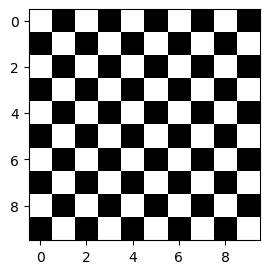

In [17]:

plt.figure(figsize=(3,3))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(ddata, cmap='binary')
plt.show()

In [28]:
history_list = []
# with open('saved_lists/streakmm/example.txt', 'r') as history_file:
# with open('saved_lists/perfectmm/perfectmm_4.txt', 'r') as history_file:
with open('saved_lists/streakmm/streakmm_157.txt', 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    


In [29]:
# data = np.array()
data = np.array(history_list[1][:300]).reshape(15,20)
# data = np.array(history_list[3][:100]).reshape(10,10)


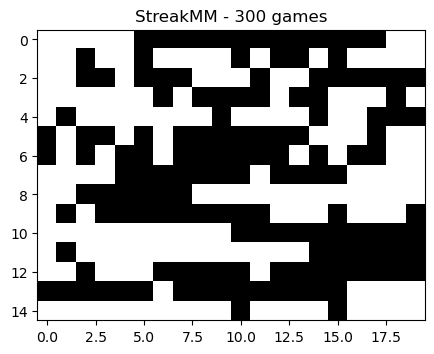

In [30]:

plt.figure(figsize=(5,5))
plt.title('StreakMM - 300 games')
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()

In [25]:
history_list = []
# with open('saved_lists/streakmm/example.txt', 'r') as history_file:
# with open('saved_lists/perfectmm/perfectmm_4.txt', 'r') as history_file:
with open('saved_lists/perfectmm/perfectmm_4.txt', 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    


In [26]:
# data = np.array()
data = np.array(history_list[1][:300]).reshape(15,20)
# data = np.array(history_list[3][:100]).reshape(10,10)


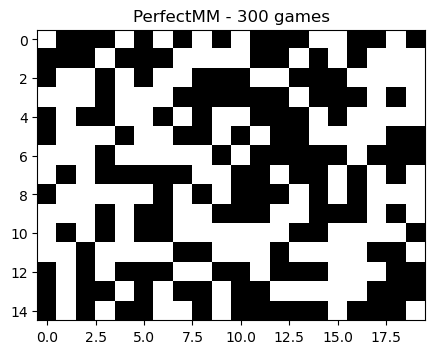

In [27]:

plt.figure(figsize=(5,5))
plt.title('PerfectMM - 300 games')
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()

In [22]:
history_list = []
# with open('saved_lists/streakmm/example.txt', 'r') as history_file:
# with open('saved_lists/perfectmm/perfectmm_4.txt', 'r') as history_file:
with open('saved_lists/nearperfectmm/nearperfectmm_6.txt', 'r') as history_file:
    history_list.extend(ast.literal_eval(history_file.read()))
    


In [23]:
# data = np.array()
data = np.array(history_list[1][:300]).reshape(15,20)
# data = np.array(history_list[3][:100]).reshape(10,10)


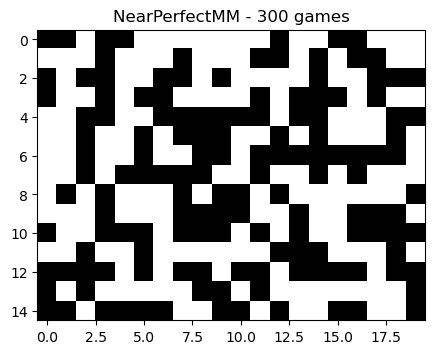

In [24]:

plt.figure(figsize=(5,5))
plt.title('NearPerfectMM - 300 games')
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(data, cmap='binary')
plt.show()